In [1]:
setwd(Sys.getenv("HOME"))

In [2]:
source("R_func/mutate_load.R")

In [3]:
library(arrow)

Some features are not enabled in this build of Arrow. Run `arrow_info()` for more information.


Attaching package: ‘arrow’


The following object is masked from ‘package:magrittr’:

    is_in


The following object is masked from ‘package:utils’:

    timestamp




In [4]:
library(ggplot2)
library(patchwork)
library(RColorBrewer)
library(ggsci)

# Load DApeaks

In [2]:
# base_dir <- "/home/whe/project/multiomics/PeakAnlys/DApeak_collection"

In [3]:
# DA.bed <- fread(
#     path_join(c(base_dir, file_type, "without_sign", "All_DApeak.bed"))
# )

# colnames(DA.bed) <- c("chr", "start", "end", "DEType")
# DA.bed %<>% mutate(
#     peak_name = paste(chr, start, end, sep="-")
# )

In [4]:
# DEType.mtx <- DA.bed$'DEType' %>% str_split(":", simplify=T)
# colnames(DEType.mtx) <- c("region", "cluster")
# DA.bed %<>% cbind(DEType.mtx)

In [5]:
# file_type <- "TopicDA"

In [25]:
# DA.peaks <- read_feather(
#     "/home/whe/project/multiomics/SCENIC/Data/Regional_DA/agg.cons.mdf.feather"
# )

In [41]:
# DA.peaks.2 <- DA.peaks %>% filter(
#     (pct.1 > 0.2) &
#     (abs(min_logfoldchanges) > log2(1.5)) &
#     (max_pvals < 0.01)
# )

# Load DEG

In [93]:
all.mdf <- fread(
    "project/multiomics/GeneAnlys/Regional_DEG/MAST/agg.cons.mdf.csv"
)

In [126]:
all.mdf.2 <- all.mdf %>% filter(
    (sign == "pos")
)

# DEG num

In [32]:
deg.num <- all.mdf.2 %>%
    group_by(cluster, region) %>% count() %>%
    mutate(match.str=paste(cluster, region)) %>%
    tibble::column_to_rownames("match.str")

# Plot

In [7]:
region_color_df <- read.csv(
    "project/multiomics/PlotFig/color_dict/region_colors.csv"
)
region_color_map <- setNames(
    region_color_df$'color', region_color_df$'group'
)

In [8]:
region_color_map

DFC         M1C         MFC         V1C 
"#D62728FF" "#2CA02CFF" "#1F77B4FF" "#9467BDFF"

In [30]:
region_level <- names(region_color_map)

In [31]:
region_level

[1] "DFC" "M1C" "MFC" "V1C"

In [9]:
subclass_color_df <- read.csv(
    "project/multiomics/PlotFig/color_dict/subclass_colors.csv"
)

In [10]:
celltype_level <- subclass_color_df$'group'

In [11]:
celltype_level

[1] "L2-3 IT"     "L4 IT"       "L5 IT"       "L6 IT"       "L6 IT Car3" 
 [6] "L5 ET"       "L5-6 NP"     "L6 CT"       "L6b"         "LAMP5"      
[11] "VIP"         "PAX6"        "PVALB"       "SST"         "Astro"      
[16] "Oligo"       "OPC"         "Micro-PVM"   "Endothelial" "VLMC"       
[21] "T-cell"

## plot

In [33]:
plot.data <- deg.num %<>% mutate(
    cluster = factor(cluster, levels=celltype_level),
    region = factor(region, levels=region_level)
)
# plot.data %<>% filter(n >= 5)
# plot.data %<>% filter(n >= 30)

In [34]:
# ylab <- "number of differential expression genes"
ylab <- "number of differential accessibility peaks"
# ylab <- "number of DEG related peaks"
xlab <- "celltype"

In [35]:
barp <- ggplot(plot.data, aes(fill=region, y=n, x=cluster)) + 
    geom_bar(position="stack", stat="identity") +
    cowplot::theme_cowplot() +
    # theme(axis.line = element_blank()) +
    scale_fill_manual(
        values = region_color_map
    ) +
    labs(x=xlab, y=ylab) +
    theme(
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 10)),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 10, l = 0)),
        axis.title = element_text(size = 20)
    ) +
    theme(axis.text = element_text(size = 15,angle = 90, vjust = 0.5, hjust=1)) +
    theme(
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 15)
    ) +
    theme(
        legend.key.height= unit(1, 'cm'),
        legend.key.width= unit(1, 'cm')
    )

In [36]:
wl <- barp$data$cluster %>% unique %>% length
wl

[1] 17

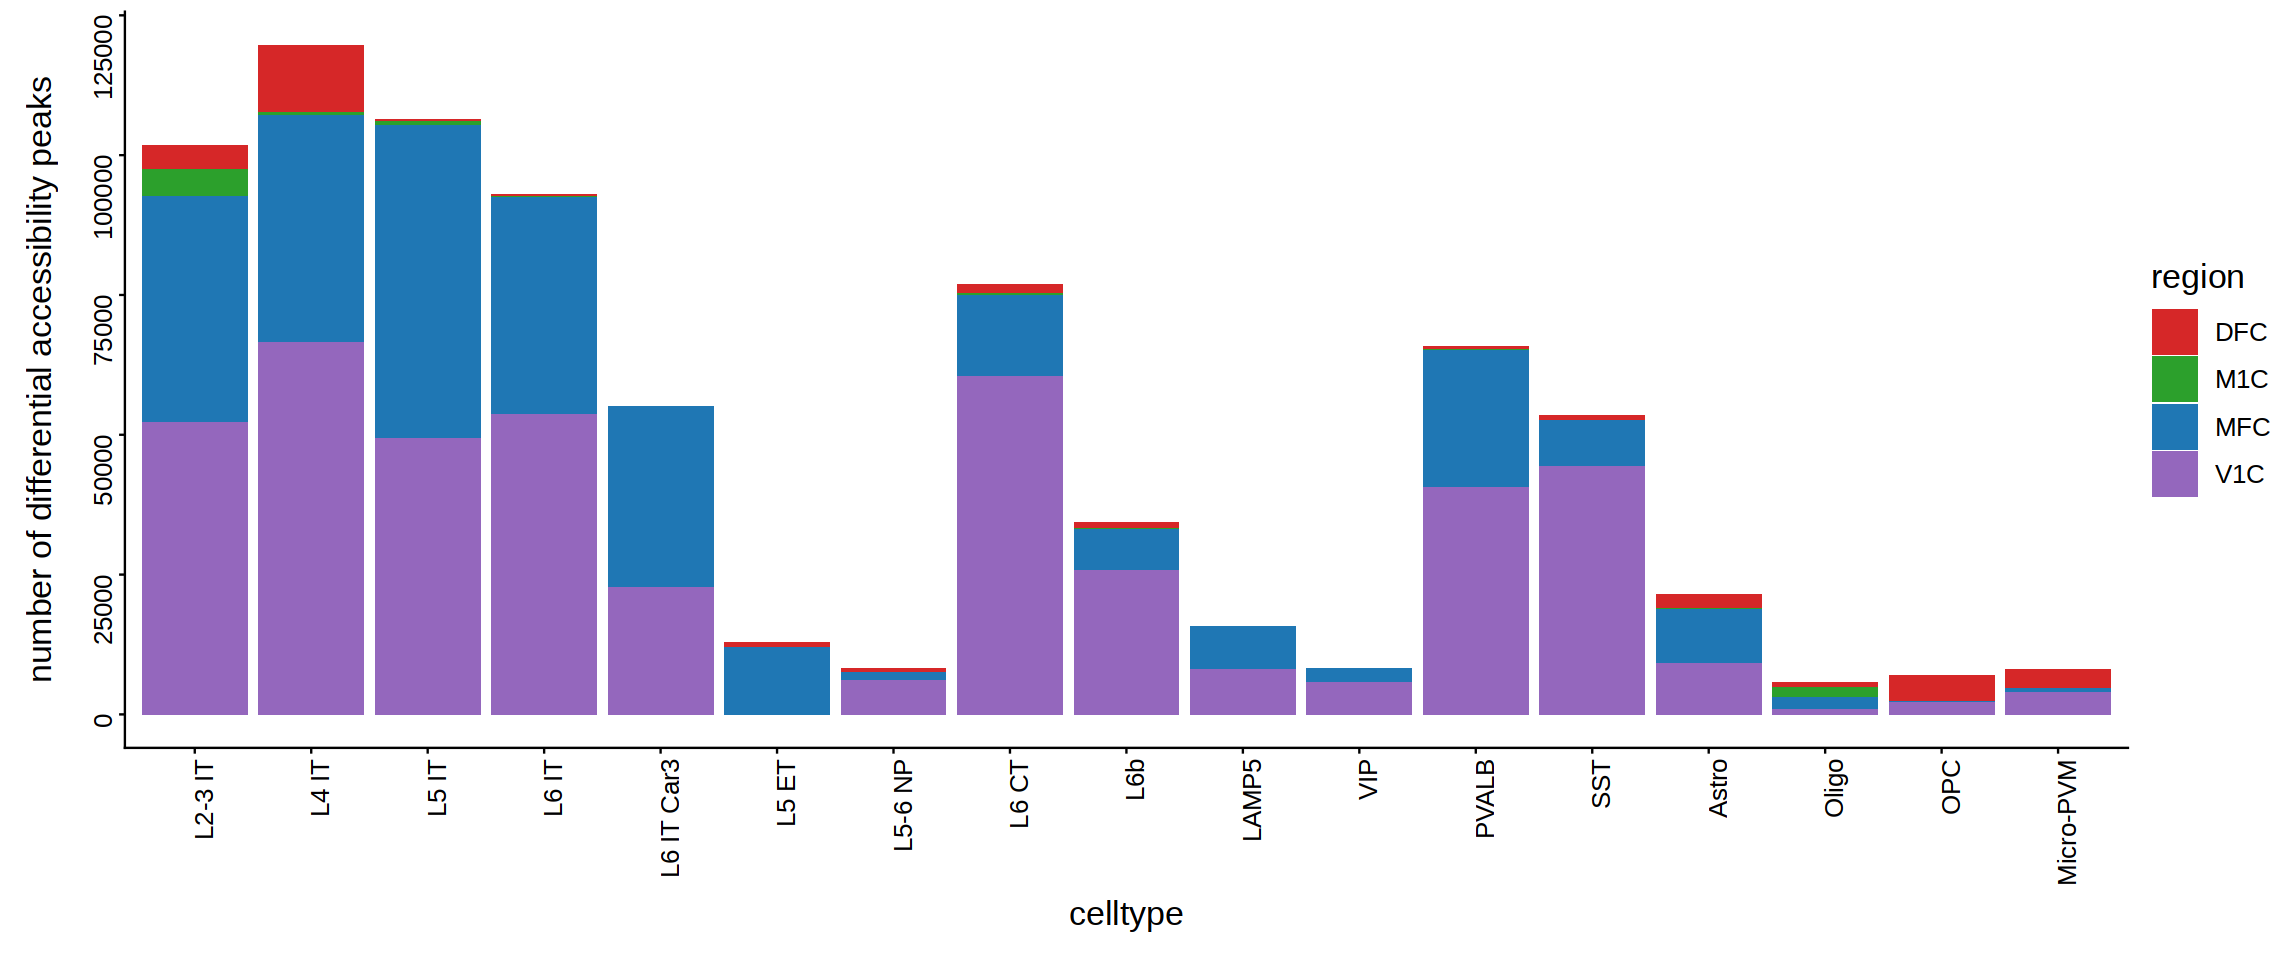

In [37]:
w <- wl + 2
h <- 8
my.plot.size(w, h)
barp

In [ ]:
## save

In [38]:
# save_dir <- "project/multiomics/PlotFig/DEG_num/DEG/raw"
save_dir <- path_join(c(
    "project/multiomics/PlotFig/DEG_num/DA", "TopicDA"
))
save_dir

project/multiomics/PlotFig/DEG_num/DA/TopicDA

In [39]:
dir_create(save_dir)

In [40]:
fpath <- path_join(c(save_dir, "DEG_num_both.pdf"))
pdf(fpath, w, h)
print(barp)
dev.off()

png 
  2